In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
trainData=pd.read_csv('D:\\train.csv')
testData = pd.read_csv("D:\\test.csv")
###############################################
testData.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [2]:
testData.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [3]:
trainData.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
def get_dict(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [5]:
trainData.drop(['belongs_to_collection','id'], axis=1, inplace=True)
testData.drop(['belongs_to_collection','id'], axis=1, inplace=True)

(array([2.411e+03, 3.630e+02, 1.230e+02, 5.500e+01, 2.000e+01, 1.700e+01,
        7.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00e+00, 3.80e+07, 7.60e+07, 1.14e+08, 1.52e+08, 1.90e+08,
        2.28e+08, 2.66e+08, 3.04e+08, 3.42e+08, 3.80e+08]),
 <BarContainer object of 10 artists>)

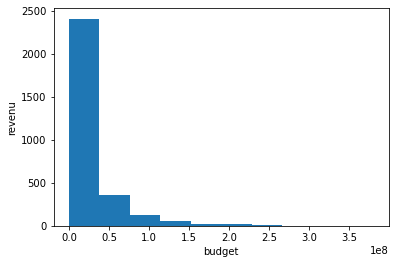

In [6]:

plt.xlabel( 'budget')
plt.ylabel('revenu')
plt.hist(trainData['budget'])

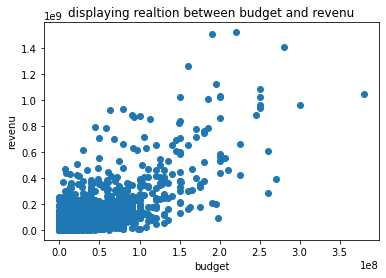

In [7]:
plt.title('displaying realtion between budget and revenu')
plt.xlabel( 'budget')
plt.ylabel('revenu')
plt.scatter(x=trainData['budget'], y=trainData['revenue'])

In [8]:
print(len(trainData[trainData['budget'] == 0]))

812


In [9]:
trainData['budget'] = trainData['budget'].replace(0, trainData['budget'].mean())

In [10]:
print(len(trainData[trainData['budget'] == 0]))

0


In [11]:
gn = pd.DataFrame(columns=['genre_name'])
gn

,genre_name


In [12]:
trainData = pd.concat([trainData, gn], axis=1)
testData = pd.concat([testData, gn], axis=1)

trainData.head()

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_name
0,14000000.00,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,NaN
1,40000000.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,NaN
2,3300000.00,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,NaN
3,1200000.00,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,NaN
4,22531334.11,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN


In [13]:
j = 0
for i in trainData['genres']:
    d = get_dict(i)
    if d != {}:
        trainData['genre_name'][j] = d[0]['name'] 
    else:
         trainData['genre_name'][j] = np.NaN
    j += 1

j = 0
for i in testData['genres']:
    d = get_dict(i)
    if d != {}:
        testData['genre_name'][j] = d[0]['name'] 
    else:
         testData['genre_name'][j] = np.NaN
    j += 1
trainData.drop(['genres'], axis=1, inplace=True)
testData.drop(['genres'], axis=1, inplace=True)
trainData.head()


C:\Users\moham\AppData\Local\Temp/ipykernel_5560/194901383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_name'][j] = d[0]['name']
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/194901383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_name'][j] = np.NaN
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/194901383.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['genre_name'][j] =

,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_name
0,14000000.00,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy
1,40000000.00,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy
2,3300000.00,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama
3,1200000.00,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller
4,22531334.11,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action


In [14]:

testData['homepage'].isnull().sum()

2978

In [15]:
trainData['homepage'].isnull().sum()

2054

In [16]:
Homepage=pd.DataFrame(columns=['Homepage'])
trainData=pd.concat([trainData,Homepage],axis=1)
testData=pd.concat([testData,Homepage],axis=1)

In [17]:
j = 0
for i in trainData['homepage']:
    if str(trainData['homepage'][j]) == 'nan':
        trainData['Homepage'][j] = 0
    else:
        trainData['Homepage'][j] = 1
    j += 1

j = 0
for i in testData['homepage']:
    if str( testData['homepage'][j]) == 'nan':
         testData['Homepage'][j] = 0
    else:
         testData['Homepage'][j] = 1
    j += 1
trainData.head()

C:\Users\moham\AppData\Local\Temp/ipykernel_5560/3964125983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Homepage'][j] = 0
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/3964125983.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Homepage'][j] = 1
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/3964125983.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['Homepage'][j] = 1
C:\Users\moham\A

,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_name,Homepage
0,14000000.00,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,0
1,40000000.00,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,0
2,3300000.00,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,1
3,1200000.00,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller,1
4,22531334.11,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action,0


In [18]:
trainData.drop(['homepage'], axis=1, inplace=True)
testData.drop(['homepage'], axis=1, inplace=True)
trainData["Homepage"].head()


0    0
1    0
2    1
3    1
4    0
Name: Homepage, dtype: object

<AxesSubplot:xlabel='Homepage', ylabel='revenue'>

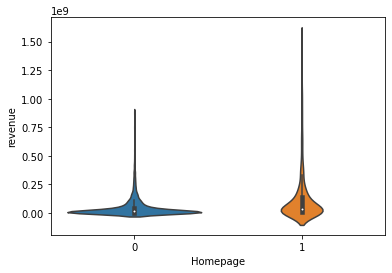

In [19]:

sns.violinplot(x='Homepage',y='revenue',data=trainData)





In [20]:
#imbd_id

In [21]:
trainData.drop(['imdb_id'], axis=1, inplace=True)
testData.drop(['imdb_id'], axis=1, inplace=True)


In [22]:
#original_language	

In [23]:
for i,e in enumerate(trainData['original_language'][:5]):
    print(i,e)

0 en
1 en
2 en
3 hi
4 ko


C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='original_language', ylabel='revenue'>

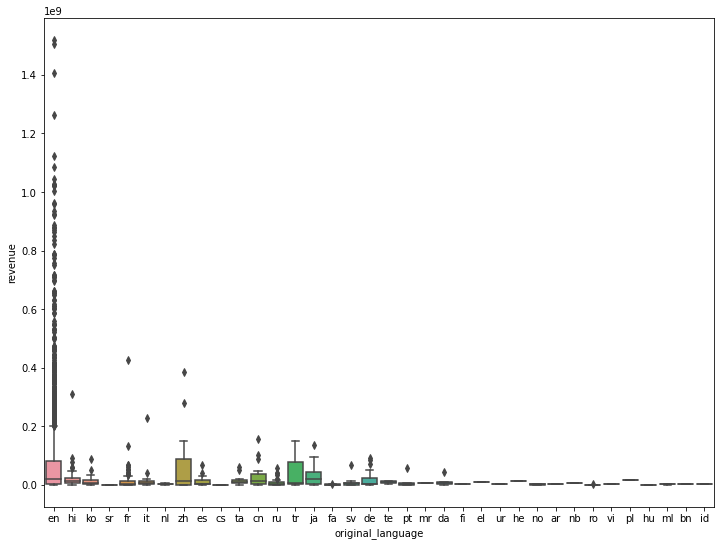

In [24]:
plt.subplots(figsize=(12, 9))
sns.boxplot('original_language','revenue',data=trainData)



In [25]:

for i in trainData['original_language']:
    if(i=='en'):
        trainData['Has_En']=1
    else:
        trainData['Has_En']=0
for i in testData['original_language']:
    if(i=='en'):
        testData['Has_En']=1
    else:
        testData['Has_En']=0

trainData.head()


,budget,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,...,status,tagline,title,Keywords,cast,crew,revenue,genre_name,Homepage,Has_En
0,14000000.00,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,0,1
1,40000000.00,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,0,1
2,3300000.00,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,1,1
3,1200000.00,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller,1,1
4,22531334.11,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action,0,1


In [26]:
#original_title $ overview

In [27]:
trainData.drop(['original_title','overview'], axis=1, inplace=True)
testData.drop(['original_title','overview'], axis=1, inplace=True)

In [28]:
#popularity	

In [29]:
trainData['popularity'].isnull().sum()

0

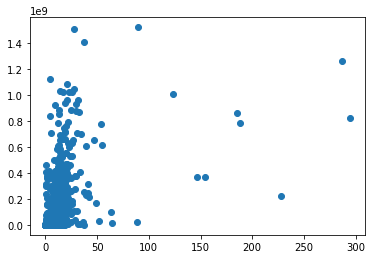

In [30]:
plt.scatter('popularity','revenue',data=trainData)
plt.show()

In [31]:
#poster_path
trainData.drop(['poster_path','original_language'], axis=1, inplace=True)
testData.drop(['poster_path','original_language'], axis=1, inplace=True)


In [32]:
#production_companies
for i,e in enumerate(trainData["production_companies"][:5]):
    print(i,e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 nan
4 nan


In [33]:
num_production_companies=pd.DataFrame(columns=['num_production_companies'])
trainData=pd.concat([trainData,num_production_companies],axis=1)
testData=pd.concat([testData,num_production_companies],axis=1)


In [34]:
j=0
for i in trainData["production_companies"]:
    d=get_dict(i)
    if len(d)!=0:
        trainData['num_production_companies'][j]=len(d)
    else:
        trainData['num_production_companies'][j]=np.NaN
    j+=1
j=0
for i in testData["production_companies"]:
    d=get_dict(i)
    if len(d)!=0:
        testData['num_production_companies'][j]=len(d)
    else:
        testData['num_production_companies'][j]=np.NaN
    j+=1


C:\Users\moham\AppData\Local\Temp/ipykernel_5560/2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=len(d)
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/2612869256.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=np.NaN
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/2612869256.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testDa

In [35]:
trainData.drop(['production_companies'], axis=1, inplace=True)
testData.drop(['production_companies'], axis=1, inplace=True)

In [36]:
trainData["num_production_companies"]

0         3
1         1
2         3
3       NaN
4       NaN
       ... 
2995      2
2996      2
2997      3
2998      2
2999      6
Name: num_production_companies, Length: 3000, dtype: object

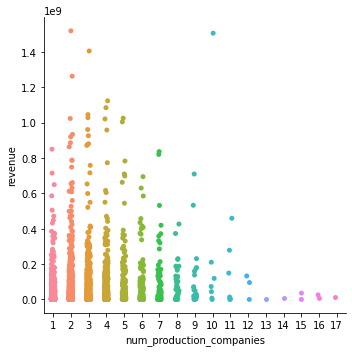

In [37]:
sns.catplot(x='num_production_companies',y='revenue',data=trainData)


In [38]:
trainData["num_production_companies"].isnull().sum()

156

In [39]:
trainData['num_production_companies'] = trainData['num_production_companies'].fillna(trainData['num_production_companies'].mode())

testData['num_production_companies'] = testData['num_production_companies'].fillna(testData['num_production_companies'].mode())


In [40]:
trainData["num_production_companies"].isnull().sum()
trainData['num_production_companies']=trainData['num_production_companies'].fillna(trainData['num_production_companies'].mean()).round()
testData['num_production_companies']=testData['num_production_companies'].fillna(testData['num_production_companies'].mean()).round()

In [41]:
#production_countries

In [42]:
for i,e in enumerate(trainData["production_countries"][:5]):
    print(i,e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]


In [43]:
prodect_countries=pd.DataFrame(columns=["production_country"])
trainData=pd.concat([trainData,prodect_countries],axis=1)
testData=pd.concat([testData,prodect_countries],axis=1)


In [44]:
j = 0
for i in trainData['production_countries']:
    d = get_dict(i)
    if d != {}:
        if len(d) > 1:
            countires = []
            for k in range(len(d)):
                countires.append(d[k]['name'])
            if 'United States of America' in countires:
                trainData['production_country'][j] = 'United States of America'
        else:
            trainData['production_country'][j] = d[0]['name']
    else:
        trainData['production_country'][j] = np.NaN
    j += 1
    
j = 0
for i in testData['production_countries']:
    d = get_dict(i)
    if d != {}:
        if len(d) > 1:
            countires = []
            for k in range(len(d)):
                countires.append(d[k]['name'])
            if 'United States of America' in countires:
                testData['production_country'][j] = 'United States of America'
        else:
            testData['production_country'][j] = d[0]['name']
    else:
        testData['production_country'][j] = np.NaN
    j += 1

C:\Users\moham\AppData\Local\Temp/ipykernel_5560/1265860272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['production_country'][j] = d[0]['name']
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/1265860272.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['production_country'][j] = np.NaN
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/1265860272.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainD

In [45]:
trainData.head()

,budget,popularity,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_name,Homepage,Has_En,num_production_companies,production_country
0,14000000.00,6.575393,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,0,1,3.0,United States of America
1,40000000.00,8.248895,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,0,1,1.0,United States of America
2,3300000.00,64.299990,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,1,1,3.0,United States of America
3,1200000.00,3.174936,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller,1,1,3.0,India
4,22531334.11,1.148070,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action,0,1,3.0,South Korea


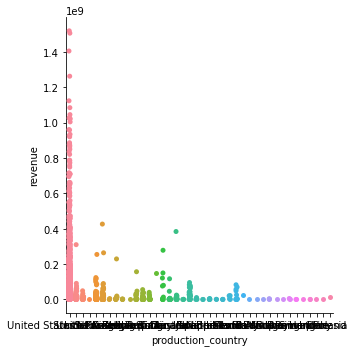

In [46]:
sns.catplot(x='production_country',y='revenue',data=trainData)

In [47]:
is_use_preduction=pd.DataFrame(columns=["is_use_preduction"])
trainData=pd.concat([trainData,is_use_preduction],axis=1)
testData=pd.concat([testData,is_use_preduction],axis=1)

In [48]:
j=0
for i in trainData["production_country"]:
    if i=='United States of America':
        trainData['is_use_preduction'][j]=1
    elif str(i)=='NaN':
        trainData['is_use_preduction'][j]=np.NaN
    else:
        trainData['is_use_preduction'][j]=0
    j+=1
j=0
for i in testData["production_country"]:
    if i=='United States of America':
        testData['is_use_preduction'][j]=1
    elif str(i)=='NaN':
        testData['is_use_preduction'][j]=np.NaN
    else:
        testData['is_use_preduction'][j]=0
    j+=1
    
    

C:\Users\moham\AppData\Local\Temp/ipykernel_5560/1949488897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=1
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/1949488897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=0
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/1949488897.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['is_use_preduction'][

In [49]:
trainData.head()


,budget,popularity,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_name,Homepage,Has_En,num_production_companies,production_country,is_use_preduction
0,14000000.00,6.575393,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,0,1,3.0,United States of America,1
1,40000000.00,8.248895,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,0,1,1.0,United States of America,1
2,3300000.00,64.299990,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,1,1,3.0,United States of America,1
3,1200000.00,3.174936,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller,1,1,3.0,India,0
4,22531334.11,1.148070,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action,0,1,3.0,South Korea,0


In [50]:
trainData.drop(['production_countries','production_country'], axis=1, inplace=True)
testData.drop(['production_countries','production_country'], axis=1, inplace=True)


In [51]:
trainData['is_use_preduction'].isnull().sum()

0

In [52]:
trainData.head()


,budget,popularity,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_name,Homepage,Has_En,num_production_companies,is_use_preduction
0,14000000.00,6.575393,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,0,1,3.0,1
1,40000000.00,8.248895,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,0,1,1.0,1
2,3300000.00,64.299990,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,1,1,3.0,1
3,1200000.00,3.174936,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller,1,1,3.0,0
4,22531334.11,1.148070,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action,0,1,3.0,0


In [53]:
#realse_data

In [54]:
trainData['Day'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[0]
trainData['Month'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[1]
trainData['Year'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[2]
trainData['Day'] = trainData['Day'].astype(int)
trainData['Month'] = trainData['Month'].astype(int)
trainData['Year'] = trainData['Year'].astype(int)
testData['Day'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[0]
testData['Month'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[1]
testData['Year'] = trainData['release_date'].str.split('/', expand=True).replace(np.nan,-1)[2]
testData['Day'] = trainData['Day'].astype(int)
testData['Month'] = trainData['Month'].astype(int)
testData['Year'] = trainData['Year'].astype(int)

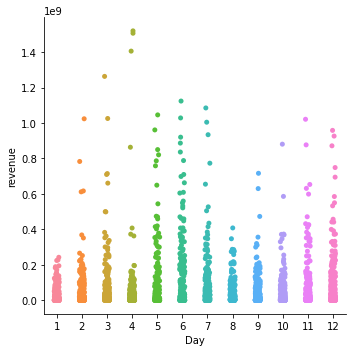

In [55]:
sns.catplot(x='Day',y='revenue',data=trainData)


In [56]:
trainData["Day"].isnull().sum()

0

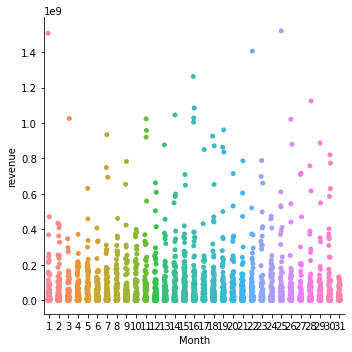

In [57]:
sns.catplot(x='Month',y='revenue',data=trainData)


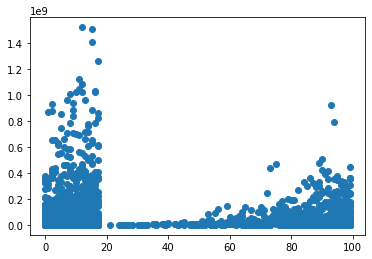

In [58]:
plt.scatter('Year','revenue',data=trainData)

In [59]:
#runtime 

In [60]:
for i,e in enumerate(trainData['runtime'][:5]):
    print(i,e)

0 93.0
1 113.0
2 105.0
3 122.0
4 118.0


In [61]:
trainData['runtime'].isnull().sum()

2

In [62]:
trainData['runtime']=trainData['runtime'].fillna(trainData['runtime'].mean()).round()
testData['runtime']=testData['runtime'].fillna(testData['runtime'].mean()).round()
trainData['runtime'].isnull().sum()

0

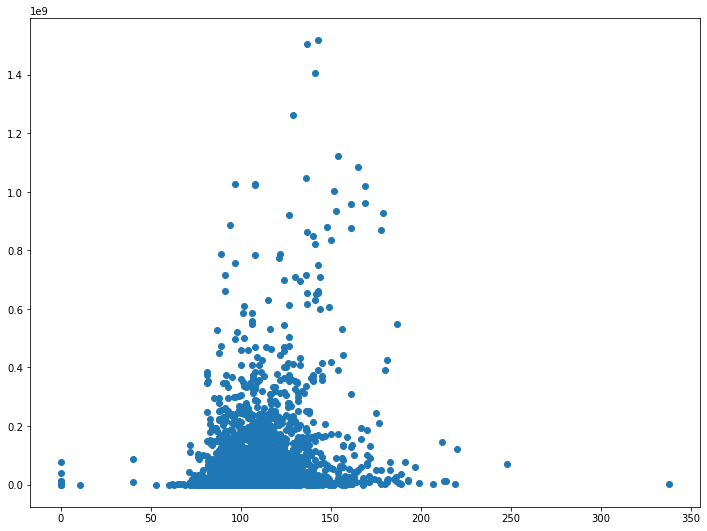

In [63]:
plt.subplots(figsize=(12, 9))
plt.scatter('runtime','revenue',data=trainData)

In [64]:
#spoken_languages

In [65]:
for i,e in enumerate(trainData['spoken_languages'][:5]):
    print(i,e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


In [66]:
number_of_spoken_languages = pd.DataFrame(columns=['number_of_spoken_languages'])
trainData = pd.concat([trainData, number_of_spoken_languages], axis=1)
testData = pd.concat([testData, number_of_spoken_languages], axis=1)

In [67]:
j = 0
for i in trainData['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        trainData['number_of_spoken_languages'][j] = len(d)
    else:
        trainData['number_of_spoken_languages'][j] = np.NaN
    j += 1
    
j = 0
for i in testData['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        testData['number_of_spoken_languages'][j] = len(d)
    else:
        testData['number_of_spoken_languages'][j] = np.NaN
    j += 1

C:\Users\moham\AppData\Local\Temp/ipykernel_5560/3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['number_of_spoken_languages'][j] = len(d)
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/3689744017.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['number_of_spoken_languages'][j] = np.NaN
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/3689744017.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


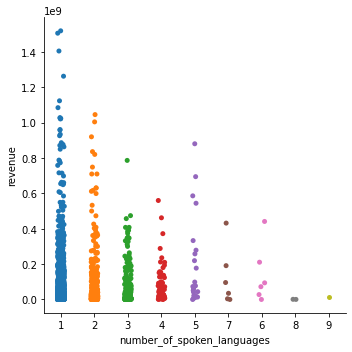

In [68]:
sns.catplot(x='number_of_spoken_languages', y='revenue', data=trainData)

In [69]:
trainData["number_of_spoken_languages"].isnull().sum()

20

In [70]:
trainData['number_of_spoken_languages']=trainData['number_of_spoken_languages'].fillna(trainData['number_of_spoken_languages'].mean()).round()
testData['number_of_spoken_languages']=testData['number_of_spoken_languages'].fillna(testData['number_of_spoken_languages'].mean()).round()

In [71]:
trainData.drop(['spoken_languages'], axis=1, inplace=True)
testData.drop(['spoken_languages'], axis=1, inplace=True)

In [72]:
trainData.head()

,budget,popularity,release_date,runtime,status,tagline,title,Keywords,cast,crew,revenue,genre_name,Homepage,Has_En,num_production_companies,is_use_preduction,Day,Month,Year,number_of_spoken_languages
0,14000000.00,6.575393,2/20/15,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,0,1,3.0,1,2,20,15,1.0
1,40000000.00,8.248895,8/6/04,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,0,1,1.0,1,8,6,4,1.0
2,3300000.00,64.299990,10/10/14,105.0,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,1,1,3.0,1,10,10,14,1.0
3,1200000.00,3.174936,3/9/12,122.0,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller,1,1,3.0,0,3,9,12,2.0
4,22531334.11,1.148070,2/5/09,118.0,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action,0,1,3.0,0,2,5,9,1.0


## LAST six features (Ahmed section)

In [73]:
###status
trainData['status'].value_counts()

testData['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [74]:
Status=pd.DataFrame(columns=["Status"])
trainData=pd.concat([trainData,Status],axis=1)
testData=pd.concat([testData,Status],axis=1)

In [75]:
j=0
for i in trainData["status"]:
    if i=='Released':
        trainData['Status'][j]=1
    elif str(i)=='NaN':
        trainData['Status'][j]=np.NaN
    else:
        trainData['Status'][j]=0
    j+=1
j=0
for i in testData["status"]:
    if i=='Released':
        testData['Status'][j]=1
    elif str(i)=='NaN':
        testData['Status'][j]=np.NaN
    else:
        testData['Status'][j]=0
    j+=1
    

C:\Users\moham\AppData\Local\Temp/ipykernel_5560/1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/1695507325.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=0
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/1695507325.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['Status'][j]=1
C:\Users\moham\AppData\Local

### This feature is not useful most of them are already released 

In [76]:
trainData.drop(['status'], axis=1, inplace=True)
testData.drop(['status'], axis=1, inplace=True)


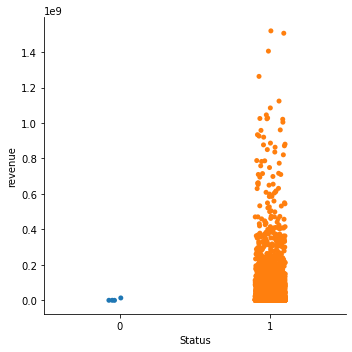

In [77]:
sns.catplot(x="Status",y="revenue",data=trainData)

In [78]:
trainData.head()

,budget,popularity,release_date,runtime,tagline,title,Keywords,cast,crew,revenue,genre_name,Homepage,Has_En,num_production_companies,is_use_preduction,Day,Month,Year,number_of_spoken_languages,Status
0,14000000.00,6.575393,2/20/15,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,0,1,3.0,1,2,20,15,1.0,1
1,40000000.00,8.248895,8/6/04,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,0,1,1.0,1,8,6,4,1.0,1
2,3300000.00,64.299990,10/10/14,105.0,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,1,1,3.0,1,10,10,14,1.0,1
3,1200000.00,3.174936,3/9/12,122.0,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller,1,1,3.0,0,3,9,12,2.0,1
4,22531334.11,1.148070,2/5/09,118.0,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action,0,1,3.0,0,2,5,9,1.0,1


## tagline

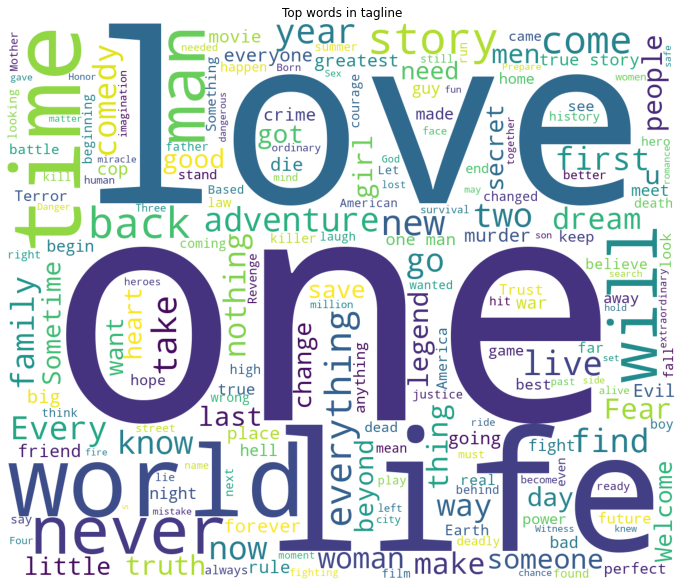

In [79]:
plt.figure(figsize = (12, 12))
text = ' '.join(trainData['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

##  from this figure it's shown most films contains comedy  , drama related words.

## title will be dropped not important

In [80]:
trainData.drop(['title','release_date','tagline','Keywords'], axis=1, inplace=True)
testData.drop(['title','release_date','tagline','Keywords'], axis=1, inplace=True)

## keywords

## I will leave keywords for now 

KeyError: 'Keywords'

## cast

## temp code below don't care now 

In [82]:
size_of_cast = pd.DataFrame(columns=['size_of_cast'])
trainData = pd.concat([trainData, size_of_cast], axis=1)
testData = pd.concat([testData, size_of_cast], axis=1)

In [83]:
j = 0
for i in trainData['cast']:
    d = get_dict(i)
    if d != {}:
        trainData['size_of_cast'][j] = len(d)
    else:
        trainData['size_of_cast'][j] = np.NaN
    j += 1
    
j = 0
for i in testData['cast']:
    d = get_dict(i)
    if d != {}:
        testData['size_of_cast'][j] = len(d)
    else:
        testData['size_of_cast'][j] = np.NaN
    j += 1

C:\Users\moham\AppData\Local\Temp/ipykernel_5560/2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/2046998917.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = np.NaN
C:\Users\moham\AppData\Local\Temp/ipykernel_5560/2046998917.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['size_of_cast'][j

In [84]:
trainData.drop(['cast'], axis=1, inplace=True)
testData.drop(['cast'], axis=1, inplace=True)

In [85]:
trainData["size_of_cast"].isnull().sum()

13

In [86]:
trainData['size_of_cast']=trainData['size_of_cast'].fillna(trainData['size_of_cast'].mean()).round()
testData['size_of_cast']=testData['size_of_cast'].fillna(testData['size_of_cast'].mean()).round()

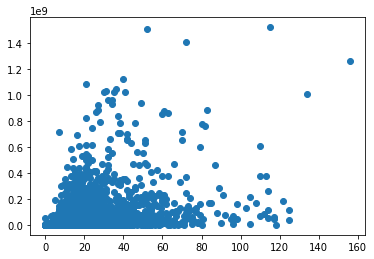

In [87]:
plt.scatter("size_of_cast","revenue",data=trainData)

In [88]:
#crew

In [89]:
trainData.drop(['crew'], axis=1, inplace=True)
testData.drop(['crew'], axis=1, inplace=True)

In [90]:

trainData.head()



,budget,popularity,runtime,revenue,genre_name,Homepage,Has_En,num_production_companies,is_use_preduction,Day,Month,Year,number_of_spoken_languages,Status,size_of_cast
0,14000000.00,6.575393,93.0,12314651,Comedy,0,1,3.0,1,2,20,15,1.0,1,24.0
1,40000000.00,8.248895,113.0,95149435,Comedy,0,1,1.0,1,8,6,4,1.0,1,20.0
2,3300000.00,64.299990,105.0,13092000,Drama,1,1,3.0,1,10,10,14,1.0,1,51.0
3,1200000.00,3.174936,122.0,16000000,Thriller,1,1,3.0,0,3,9,12,2.0,1,7.0
4,22531334.11,1.148070,118.0,3923970,Action,0,1,3.0,0,2,5,9,1.0,1,4.0


In [91]:

from sklearn.preprocessing import LabelEncoder
def Feature_Encoder(trainData,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(trainData[c].values))
        trainData[c] = lbl.transform(list(trainData[c].values))
    return trainData
cols={'genre_name'}
trainData=Feature_Encoder(trainData,cols)
def Feature_Encoder(testData,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(testData[c].values))
        testData[c] = lbl.transform(list(testData[c].values))
    return testData
cols={'genre_name'}
testData=Feature_Encoder(testData,cols)

In [92]:
trainData.head()

,budget,popularity,runtime,revenue,genre_name,Homepage,Has_En,num_production_companies,is_use_preduction,Day,Month,Year,number_of_spoken_languages,Status,size_of_cast
0,14000000.00,6.575393,93.0,12314651,3,0,1,3.0,1,2,20,15,1.0,1,24.0
1,40000000.00,8.248895,113.0,95149435,3,0,1,1.0,1,8,6,4,1.0,1,20.0
2,3300000.00,64.299990,105.0,13092000,6,1,1,3.0,1,10,10,14,1.0,1,51.0
3,1200000.00,3.174936,122.0,16000000,17,1,1,3.0,0,3,9,12,2.0,1,7.0
4,22531334.11,1.148070,118.0,3923970,0,0,1,3.0,0,2,5,9,1.0,1,4.0


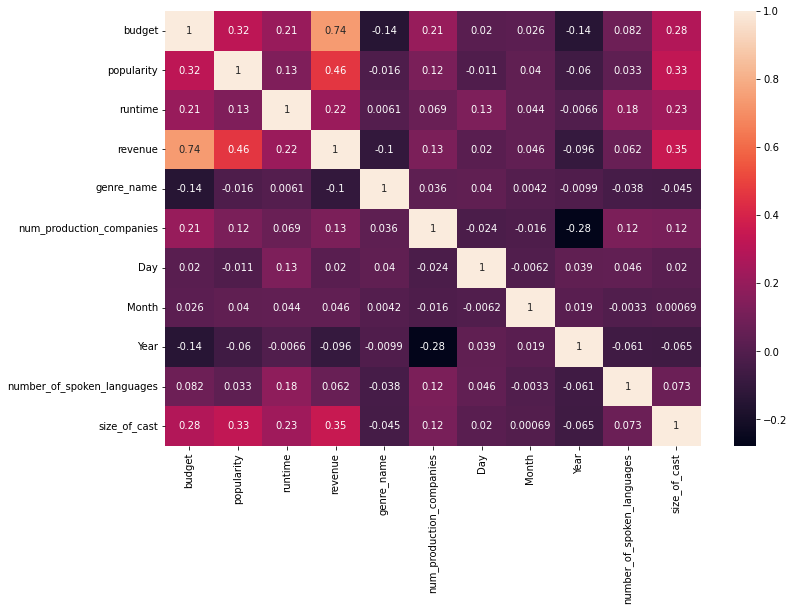

In [93]:
corr =trainData.corr()
top_feature = corr.index[abs(corr['revenue'])>0.0]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = trainData[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [94]:
testData.head()

,budget,popularity,runtime,genre_name,Homepage,Has_En,num_production_companies,is_use_preduction,Day,Month,Year,number_of_spoken_languages,Status,size_of_cast
0,0,3.851534,90.0,1,1,0,1.0,1,2.0,20.0,15.0,2.0,1,7.0
1,88000,3.559789,65.0,11,0,0,1.0,1,8.0,6.0,4.0,1.0,1,10.0
2,0,8.085194,100.0,3,0,0,3.0,1,10.0,10.0,14.0,1.0,1,9.0
3,6800000,8.596012,130.0,6,1,0,3.0,0,3.0,9.0,12.0,3.0,1,23.0
4,2000000,3.217680,92.0,10,0,0,3.0,1,2.0,5.0,9.0,1.0,1,4.0


In [ ]:
X=trainData.iloc[:,0:10] #Features
Y=trainData['revenue'] #Label

X_train, X_test, y_train, y_test = train_test_split(x,, test_size = 0.20,shuffle=False)


poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X_train)


poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_train_predicted = poly_model.predict(X_train_poly)
ypred=poly_model.predict(poly_features.transform(X_test))

# predicting on test data-set
prediction = poly_model.predict(poly_features.fit_transform(X_test))
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))
